# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
# This study considers real data collected from a Portuguese retail bank, between May 2008 and June 2013 with 11.2% of success.
# The dataset collected is related to 17 campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [21]:
import pandas as pd
from time import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier


In [25]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [28]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
# identify numerical fields
numerical_cols = df.select_dtypes(['float','int']).dropna(axis = 1)
numerical_cols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [31]:
# Selecting  numerical columns to scale
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler=StandardScaler()
scaler.fit(df[numerical_cols.columns])
df[numerical_cols.columns]=scaler.transform(df[numerical_cols.columns])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [32]:
X = df.iloc[:, 0:7]
y = df.iloc[:, -1:]

X = pd.get_dummies(X.iloc[:,1:7])
X['age'] = df['age']
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,1.533034
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,True,False,False,1.628993
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,True,False,False,-0.290186
3,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,-0.002309
4,False,False,False,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,1.533034


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, 21419 to 15795
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_admin.                     24712 non-null  bool   
 1   job_blue-collar                24712 non-null  bool   
 2   job_entrepreneur               24712 non-null  bool   
 3   job_housemaid                  24712 non-null  bool   
 4   job_management                 24712 non-null  bool   
 5   job_retired                    24712 non-null  bool   
 6   job_self-employed              24712 non-null  bool   
 7   job_services                   24712 non-null  bool   
 8   job_student                    24712 non-null  bool   
 9   job_technician                 24712 non-null  bool   
 10  job_unemployed                 24712 non-null  bool   
 11  job_unknown                    24712 non-null  bool   
 12  marital_divorced               24712 non-null  

In [34]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, 21419 to 15795
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       24712 non-null  object
dtypes: object(1)
memory usage: 386.1+ KB


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [42]:
svc_model = svm.SVC()

start = time()
svc_model.fit(X_train, y_train)
svc_model_time = time() - start

print(f"SVC Execution time: {time() - start}s")
print(f'Training Data SVC score: {svc_model.score(X_train.values, y_train)}')
print(f'Validation Data SVC score: {svc_model.score(X_test.values, y_test)}')


/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC Execution time: 10.05634593963623s


/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Training Data SVC score: 0.8877063774684364


/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Validation Data SVC score: 0.8877154649186696


In [45]:
knn_model = KNeighborsClassifier()

start = time()
knn_model.fit(X_train, y_train)
knn_model_time = time() - start

print(f"KNN Training time: {time() - start}s")
print(f'Training data Score KNN: {knn_model.score(X_train.values, y_train)}')
print(f'Testing data Score KNN: {knn_model.score(X_test.values, y_test)}')

/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Training time: 0.01946711540222168s
Training data Score KNN: 0.8896892198122369


/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Testing data Score KNN: 0.8756372906045157


In [46]:
dt_model = DecisionTreeClassifier()

start = time()
dt_model.fit(X_train, y_train)
dt_model_time= time() - start

print(f"Decision Tree Training time: {time() - start}s")
print(f'Training data Score Decision Tree: {dt_model.score(X_train.values, y_train)}')
print(f'Testing data Score Decision Tree: {dt_model.score(X_test.values, y_test)}')

Decision Tree Training time: 0.06341385841369629s
Training data Score Decision Tree: 0.9206053739074134
Testing data Score Decision Tree: 0.8599781500364166


/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lreg_model = LogisticRegression()

start = time()
lreg_model.fit(X_train, y_train)
lreg_model_time = time() - start

print(f"Decision Tree Training time: {time() - start}s")
print(f'Training data Score LogisticRegression: {lreg_model.score(X_train.values, y_train)}')
print(f'Testing data Score LogisticRegression: {lreg_model.score(X_test.values, y_test)}')

/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Training time: 0.5839900970458984s
Training data Score LogisticRegression: 0.8872207834250566
Testing data Score LogisticRegression: 0.8875333818888079


/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Problem 9: Score the Model

What is the accuracy of your model?

In [48]:
# Training data Score LogisticRegression: 0.8872207834250566


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [50]:
import numpy as np
data = {'Model': ['Logistic Regression', 'KNN algorithm', 'Decision Tree', 'SVM Model'],
        'Train Time (s)': [lreg_model_time, knn_model_time, dt_model_time, svc_model_time],
        'Train Accuracy': [lreg_model.score(X_train, y_train),
                           knn_model.score(X_train.values, y_train.values),
                           dt_model.score(X_train, y_train),
                           svc_model.score(X_train, y_train)],
        'Test Accuracy': [lreg_model.score(X_test, y_test),
                          knn_model.score(X_test.values, y_test.values),
                          dt_model.score(X_test, y_test),
                          svc_model.score(X_test, y_test)]}

df_models = np.round(pd.DataFrame(data), decimals = 4)
df_models

/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/salluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.5839,0.8872,0.8875
1,KNN algorithm,0.0194,0.8897,0.8756
2,Decision Tree,0.0634,0.9206,0.8600
3,SVM Model,10.0563,0.8877,0.8877


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [51]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [53]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
38,0.024255,0.001938,0.009726,0.002468,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.887504,0.887828,0.887666,0.886695,0.887423,0.000436,1
33,0.019285,0.002356,0.007079,0.001380,entropy,3,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887504,0.887180,0.887180,0.887504,0.887342,0.000162,2
8,0.018069,0.000353,0.006136,0.000075,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.887504,0.887180,0.887180,0.887504,0.887342,0.000162,2
48,0.039639,0.005048,0.006420,0.000151,entropy,20,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.887504,0.887828,0.887180,0.886695,0.887302,0.000419,4
13,0.023546,0.001017,0.006404,0.000310,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.887504,0.887828,0.887180,0.886695,0.887302,0.000419,4


In [54]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       random_state=42)

In [58]:
opt_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       random_state=42)
start = time()
opt_tree_model.fit(X_train, y_train)
stop = time()
o_tree_model_time = stop - start
print(f"Training time: {stop - start}s")
print(f'tree_model score on training data: {opt_tree_model.score(X_train, y_train)}')
print(f'tree_model score on testing data: {opt_tree_model.score(X_test, y_test)}')

Training time: 0.03193807601928711s
tree_model score on training data: 0.8876659112981548
tree_model score on testing data: 0.8868050497693615


In [60]:
X_train.columns.to_list()

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'age']

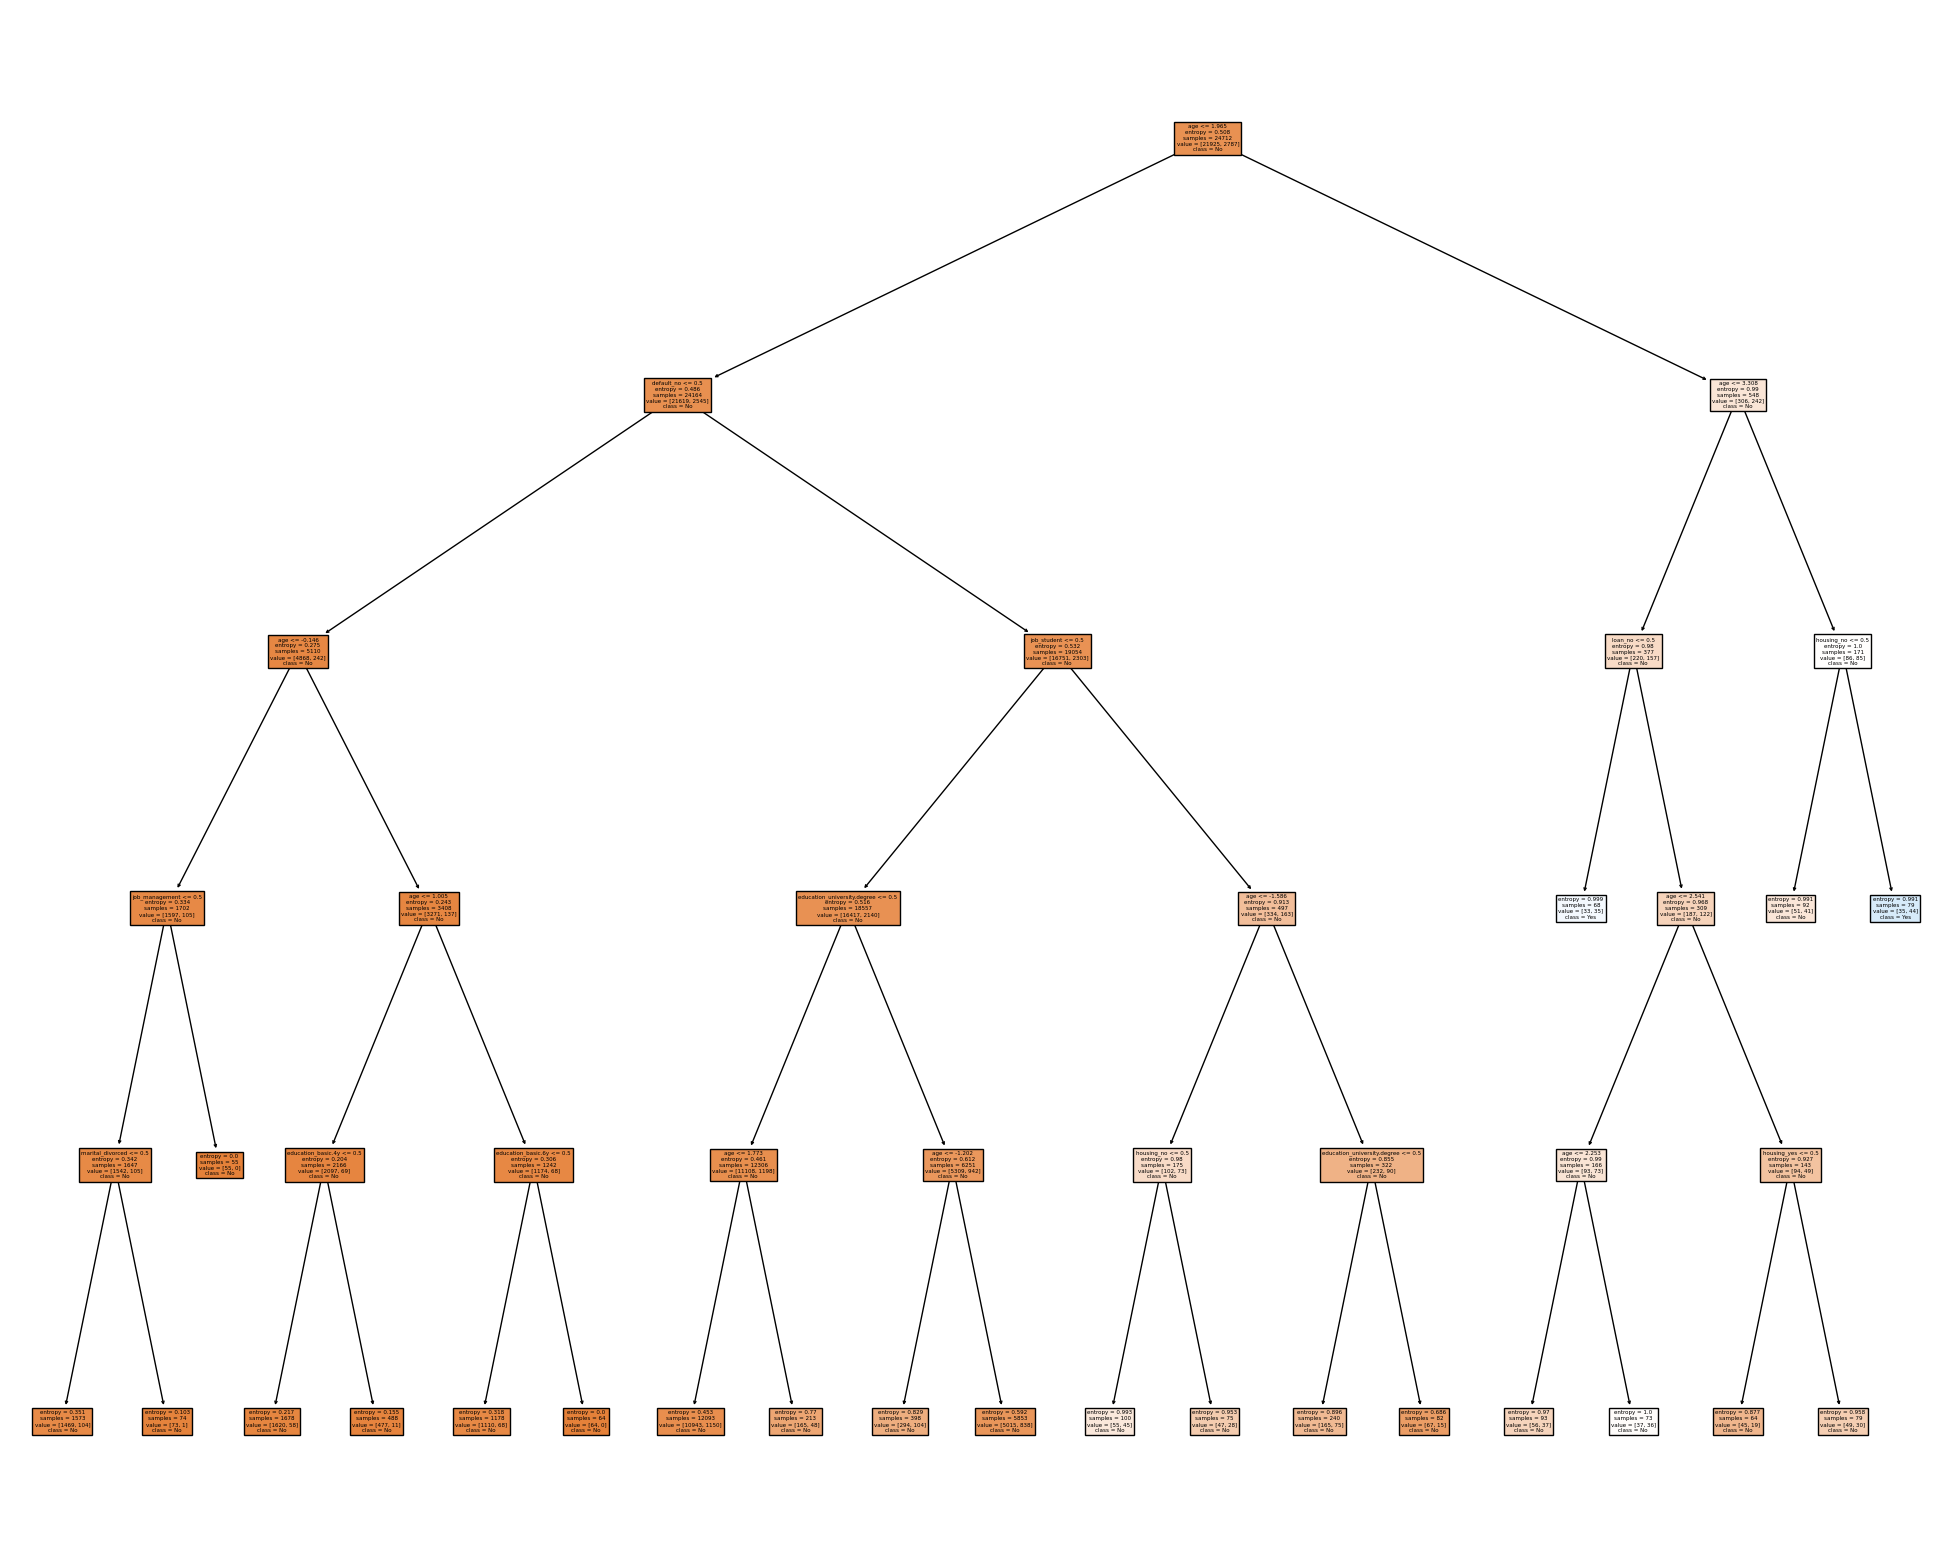

In [63]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(opt_tree_model,
                   feature_names=X_train.columns.to_list(),
                   class_names=['No','Yes'],
                   filled=True)
fig.savefig('decisiontree.jpg')

In [65]:
fi = pd.DataFrame(opt_tree_model.feature_importances_, index = [X_train.columns], columns=['feature importance'])
fi.sort_values(by='feature importance', ascending=False)

,feature importance
age,0.465855
default_no,0.254925
job_student,0.142327
education_university.degree,0.110001
education_basic.6y,0.006960
job_management,0.006696
marital_divorced,0.004394
loan_no,0.003062
housing_no,0.002961
education_basic.4y,0.001799


##### Questions